<a href="https://colab.research.google.com/github/MarielaBulbarela/Inteligencia_Artificial_y_Redes_Neuronales/blob/main/%5CActividadesRNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MARIELA BULBARELA VÁZQUEZ 2109277 HORA:N1

**Actividad 5: Uso de software para búsqueda.**

Cargar librerias

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


Cargar datos

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

Preprocesamiento de datos

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

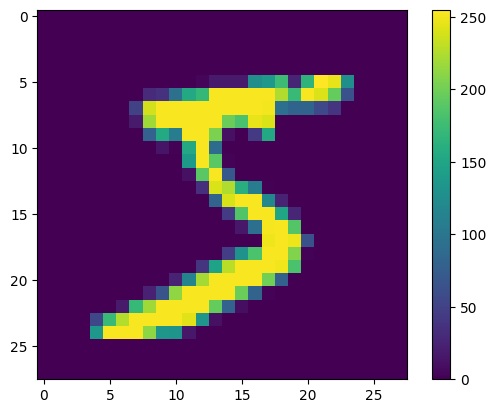

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

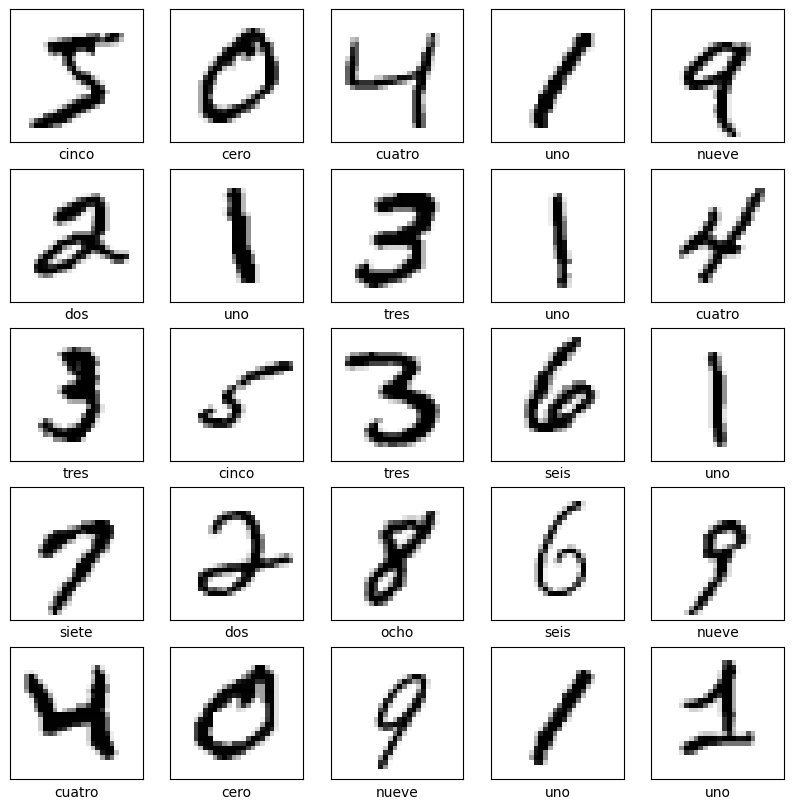

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Selección y entrenamiento del modelo

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1151 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0878 - accuracy: 0.9765 - 2s/epoch - 6ms/step

Test accuracy: 0.9764999747276306


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [17]:
predictions[0]

array([1.8457322e-10, 3.3364269e-09, 5.3112775e-08, 1.7800007e-04,
       5.0098279e-14, 1.4058917e-08, 3.1660382e-16, 9.9982119e-01,
       8.5136477e-08, 7.4902630e-07], dtype=float32)

In [18]:
np.argmax(predictions[0])

7

In [19]:
test_labels[0]

7

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Prueba de modelo

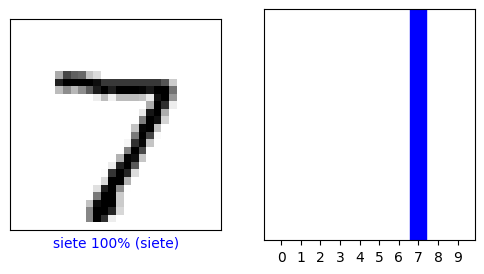

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

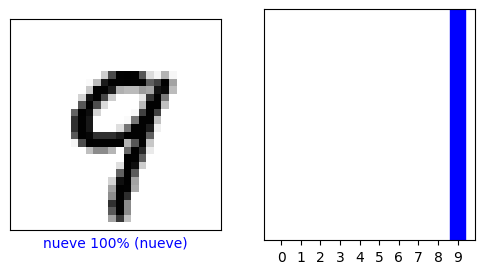

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

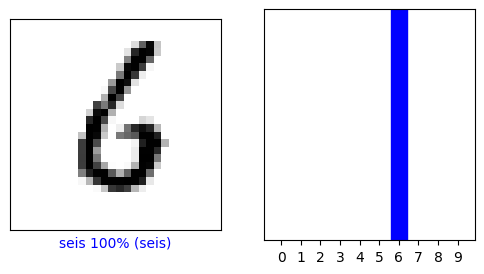

In [23]:
i = 50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

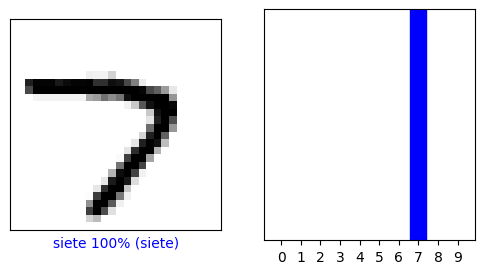

In [24]:
i = 70
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

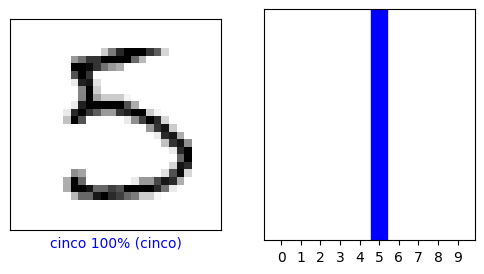

In [25]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

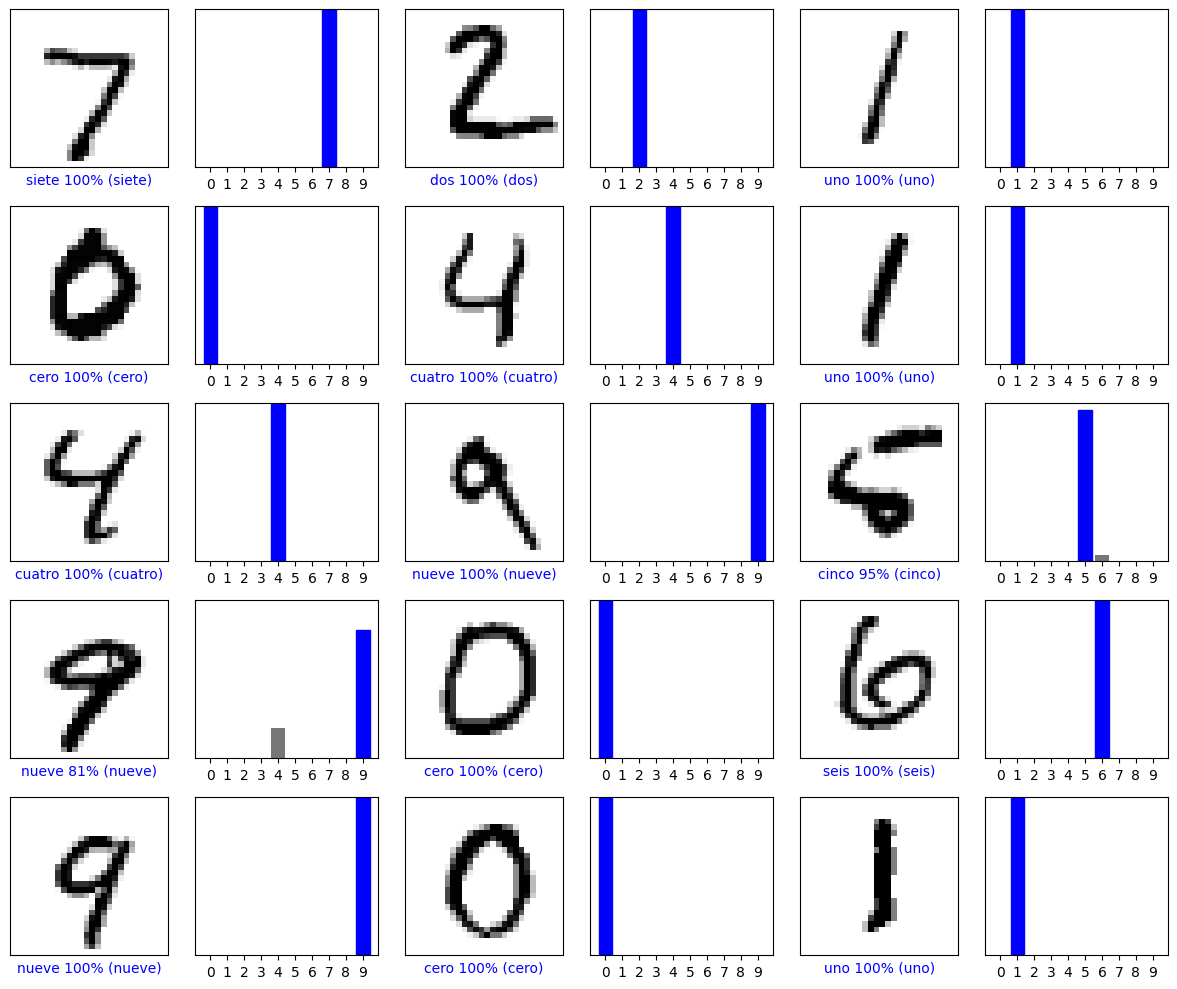

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 138ms/step
[[5.6983617e-13 2.3721089e-08 9.9999678e-01 1.3555809e-08 2.0275604e-23
  2.8293270e-09 4.7993995e-09 1.4911031e-18 3.2460416e-06 5.6066467e-17]]


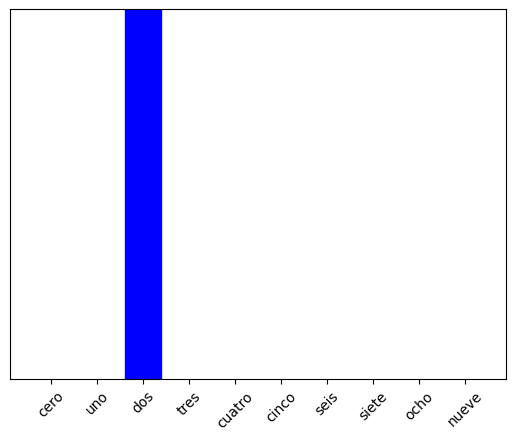

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2